<a href="https://colab.research.google.com/github/Achillean-1/Image-Classification---Machine-Learning/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install split-folders
!pip install wget

Copying files: 1189 files [00:16, 836.91 files/s]

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import splitfolders
import wget
import zipfile

In [ ]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
wget.download(url, 'rockpaperscissors.zip')

with zipfile.ZipFile("rockpaperscissors.zip", "r") as zip_ref:
    zip_ref.extractall("")

In [ ]:
splitfolders.ratio("/content/rockpaperscissors/rps-cv-images", output="data", seed=1337, ratio=(0.6, 0.4))


Copying files: 0 files [00:00, ? files/s]
Copying files: 274 files [00:00, 2736.92 files/s]
Copying files: 567 files [00:00, 2847.55 files/s]
Copying files: 852 files [00:00, 2680.03 files/s]
Copying files: 1122 files [00:00, 2668.56 files/s]
Copying files: 1390 files [00:00, 1806.98 files/s]
Copying files: 1602 files [00:01, 912.53 files/s] 
Copying files: 1756 files [00:01, 822.95 files/s]
Copying files: 1880 files [00:01, 762.93 files/s]
Copying files: 1987 files [00:01, 809.56 files/s]
Copying files: 2188 files [00:01, 1129.68 files/s]


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    "data/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    "data/val",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 876 images belonging to 3 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
import time
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('model_weights.h5', save_best_only=True)

start_time = time.time()

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=12,
    callbacks=[checkpoint]
)

end_time = time.time()
total_time = end_time - start_time
print("Total time taken for 12 epochs: {:.2f} seconds".format(total_time))

Epoch 1/12
41/41 [==============================] - 117s 3s/step - loss: 1.0765 - accuracy: 0.5038 - val_loss: 0.5267 - val_accuracy: 0.8287
Epoch 2/12
41/41 [==============================] - 97s 2s/step - loss: 0.4494 - accuracy: 0.8300 - val_loss: 0.2894 - val_accuracy: 0.9155
Epoch 3/12
41/41 [==============================] - 91s 2s/step - loss: 0.3119 - accuracy: 0.8895 - val_loss: 0.3225 - val_accuracy: 0.9062
Epoch 4/12
41/41 [==============================] - 100s 2s/step - loss: 0.2556 - accuracy: 0.9093 - val_loss: 0.2451 - val_accuracy: 0.9155
Epoch 5/12
41/41 [==============================] - 104s 3s/step - loss: 0.2588 - accuracy: 0.8994 - val_loss: 0.2205 - val_accuracy: 0.9306
Epoch 6/12
41/41 [==============================] - 101s 2s/step - loss: 0.1965 - accuracy: 0.9238 - val_loss: 0.1643 - val_accuracy: 0.9433
Epoch 7/12
41/41 [==============================] - 98s 2s/step - loss: 0.2033 - accuracy: 0.9253 - val_loss: 0.1371 - val_accuracy: 0.9537
Epoch 8/12
41/41

In [ ]:
accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)[1]
print(f"Akurasi model: {accuracy*100:.2f}%")

27/27 [==============================] - 14s 525ms/step - loss: 0.1248 - accuracy: 0.9653
Akurasi model: 96.53%


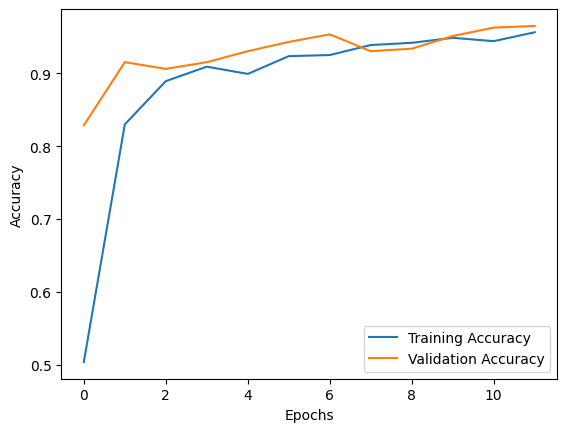

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

READ ME

PROGRAM INI MEMILIKI KEKURANGAN YAITU BACKGROUND GAMBAR HARUS MENJAUHI WARNA OBJECT YAITU KULIT TANGAN, SEBAGAI CONTOH HITAM ATAUPUN MERAH ATAUPUN HIJAU UNTUK MENINGKATKAN AKURASI PEMBELAJARAN MESIN. INI TERJADI KARENA KETERBATASAN JENIS DATA YANG MENGANDALKAN GAMBAR SECARA KESELURUHAN MENJADIKAN GREEN SCREEN SEBAGAI BACKGROUND. SEHINGGA GAMBAR DENGAN BACKGROUND TIDAK POLOS, TIDAK DAPAT DENGAN MUDAH DIANALISIS.

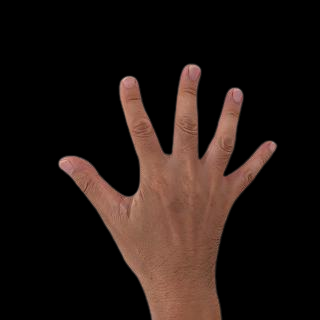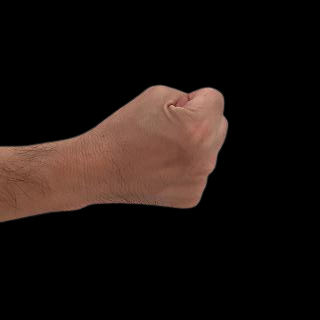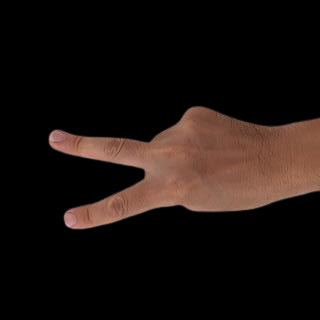

Saving 20231115_000144-removebg-preview (1).png to 20231115_000144-removebg-preview (1).png
1/1 [==============================] - 0s 103ms/step
20231115_000144-removebg-preview (1).png
Prediction: [[0. 0. 1.]]
Category: scissors
Image saved to: /content/uploaded_image/20231115_000144-removebg-preview (1).png


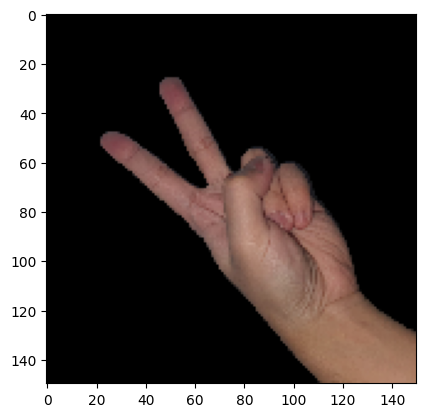

In [ ]:
import os
import numpy as np
from google.colab import files
from keras.preprocessing import image
import shutil

%matplotlib inline

output_folder = '/content/uploaded_image'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x, batch_size=10)

    print(fn)
    print('Prediction:', classes)

    predicted_class = np.argmax(classes, axis=1)
    if predicted_class == 0:
        print('Category: paper')
    elif predicted_class == 1:
        print('Category: rock')
    elif predicted_class == 2:
        print('Category: scissors')

    new_path = os.path.join(output_folder, fn)
    plt.imsave(new_path, image.array_to_img(x[0]))
    print(f'Image saved to: {new_path}')

for fn in uploaded.keys():
    current_path = os.path.join(os.getcwd(), fn)
    new_path = os.path.join(output_folder, fn)
    shutil.move(current_path, new_path)

Nama Lengkap: Nicholas Rayden


Profile Dicoding: https://www.dicoding.com/users/nicholas_rayden/academies


Username: nicholas_rayden


Email: nicholasrayden@gmail.com